# Jocurile ca probleme de cautare

Ne referim la jocuri cu 2 jucatori (care pe rand, alternativ, fac cate o mutare), cu informatie completa, adica ambii jucatori cunosc integral starea curenta a jocului si toate mutarile posibile din acea stare (contra-exemplu: jocurile de carti unde fiecare jucator stie doar cartile sale, dar nu si pe ale oponentului sau ordinea cartilor de pe masa, deci are informatie incompleta).
Mutarile sunt deterministe, nu includ probabilitati (de exemplu nu depind de aruncarea unui zar).
Jocul se incheie cand se ajunge intr-o stare „terminala” conform regulilor jocului. Aceleasi reguli determina care este rezultatul jocului (care jucator a castigat sau daca eventual a fost remiza).

Un joc va fi reprezentat printr-un arbore de joc in care nodurile corespund starilor de joc, iar arcele corespund mutarilor. Radacina arborelui este starea initiala a jocului, iar frunzele arborelui sunt starile terminale ale jocului.
Cei doi jucatori vor fi numiti MAX si MIN. Jucatorul MAX este cel care face prima mutare, apoi cei doi jucatori muta alternativ pana se termina jocul. In arborele de joc, fiecare nivel contine mutarile unui anumit jucator: radacina pentru MAX, apoi toti fiii radacinii sunt pentru MIN, apoi nivelul urmator pentru MAX, si tot asa alternand nivelurile.
La finalul jocului, se acorda puncte jucatorului castigator (sau penalizari celui care a pierdut). Pentru asta, se va folosi o functie de utilitate,  care acorda o valoare numerica rezultatului unui joc (de exemplu 1 pentru castig, -1 pentru pierdere, 0 pentru remiza).

Jucatorul MAX incearca sa castige sau sa-si maximizeze scorul din acel moment. Jucatorul MIN, oponentul sau, incearca sa minimizeze scorul lui MAX. Deci la fiecare pas, jucatorul MIN va alege acea mutare care este cea mai nefavorabila pentru MAX. Jucatorul MAX trebuie sa gaseasca (folosind arborele de joc) o strategie care-l va conduce la castigarea jocului, indiferent de actiunile lui MIN.

In probleme, vom avea jucatorul MAX (calculatorul care isi alege mutarea folosind algoritmul) versus jucatorul MIN (omul care introduce de la tastatura mutarea dorita).

# Algoritmul Minimax

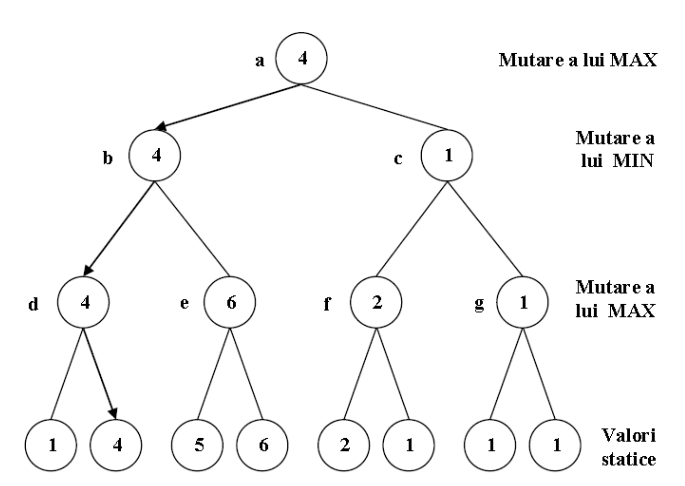

Valorile poziţiilor de la ultimul nivel sunt determinate de către funcţia de utilitate şi se numesc valori statice. Valorile minimax ale nodurilor interne sunt calculate în mod dinamic, în manieră bottom-up, nivel cu nivel, până când este atins nodul-rădăcină. Valoarea rezultată, corespunzătoare acestuia, este 4 şi, prin urmare, cea mai bună mutare a lui MAX din poziţia a este a-b. Cel mai bun răspuns al lui MIN este b-d. Această secvenţă a jocului poartă denumirea de variaţie principală. Ea defineşte jocul optim de tip minimax pentru ambele părţi. Se observă că valoarea poziţiilor de-a lungul variaţiei principale nu variază. Prin urmare, mutările corecte sunt cele care conservă valoarea jocului.

In practica, nu vom genera intreg arborele de cautare, ci il vom extinde doar pana la o adancime maxima data.

Ideea este de a evalua aceste poziţii terminale ale căutării, fără a mai căuta dincolo de ele, cu scopul de a face economie de timp. Aceste estimări se propagă apoi în sus de-a lungul arborelui, conform principiului Minimax. Mutarea care conduce de la poziţia iniţială, nodul-rădăcină, la cel mai promiţător succesor al său (conform acestor evaluări) este apoi efectuată în cadrul jocului.

In algoritm vom inlocui functia de utilitate (aplicata doar starilor terminale de joc) cu functia de evaluare (care se poate aplica oricarei stari de joc, nu neaparat una terminala).

O funcţie de evaluare întoarce o estimaţie, realizată dintr-o poziţie dată, a utilităţii aşteptate a jocului. Ea are la bază evaluarea şanselor de câştigare a jocului de către fiecare dintre părţi, pe baza calculării caracteristicilor unei poziţii. Performanţa unui program referitor la jocuri este extrem de dependentă de calitatea funcţiei de evaluare utilizate.

Funcţia de evaluare trebuie să îndeplinească anumite condiţii evidente: ea trebuie să concorde cu funcţia de utilitate în ceea ce priveşte stările terminale, calculele efectuate nu trebuie să dureze prea mult şi ea trebuie să reflecte în mod corect şansele efective de câştig.

## Pași

1. Generează întregul arbore de joc, până la stările terminale.
2. Aplică funcţia de utilitate fiecărei stări terminale pentru a obţine valoarea corespunzătoare stării.
3. Deplasează-te înapoi în arbore, de la nodurile-frunze spre nodul-rădăcină, determinând, corespunzător fiecărui nivel al arborelui, valorile care reprezintă utilitatea nodurilor aflate la acel nivel. Propagarea acestor valori la niveluri anterioare se face prin intermediul nodurilor- părinte succesive, conform următoarei reguli:
  - dacă starea-părinte este un nod de tip MAX, atribuie-i maximul dintre valorile avute de fiii săi;
  - dacă starea-părinte este un nod de tip MIN, atribuie-i minimul dintre valorile avute de fiii săi.
4. Ajuns în nodul-rădăcină, alege pentru MAX acea mutare care conduce la valoarea maximă.

**Observație:**
Decizia luată la pasul 4 al algoritmului se numeşte decizia minimax, întrucât ea maximizează utilitatea, în ipoteza că oponentul joacă perfect cu scopul de a o minimiza.

## Pseudocod

```
function minimax(node, depth, maximizingPlayer) is
    if depth = 0 or node is a terminal node then
        return the heuristic value of node
    if maximizingPlayer then
        value := −∞
        for each child of node do
            value := max(value, minimax(child, depth − 1, FALSE))
        return value
    else (* minimizing player *)
        value := +∞
        for each child of node do
            value := min(value, minimax(child, depth − 1, TRUE))
        return value

(* Initial call *)
minimax(origin, depth, TRUE)
```

# Algoritmul Alpha-Beta

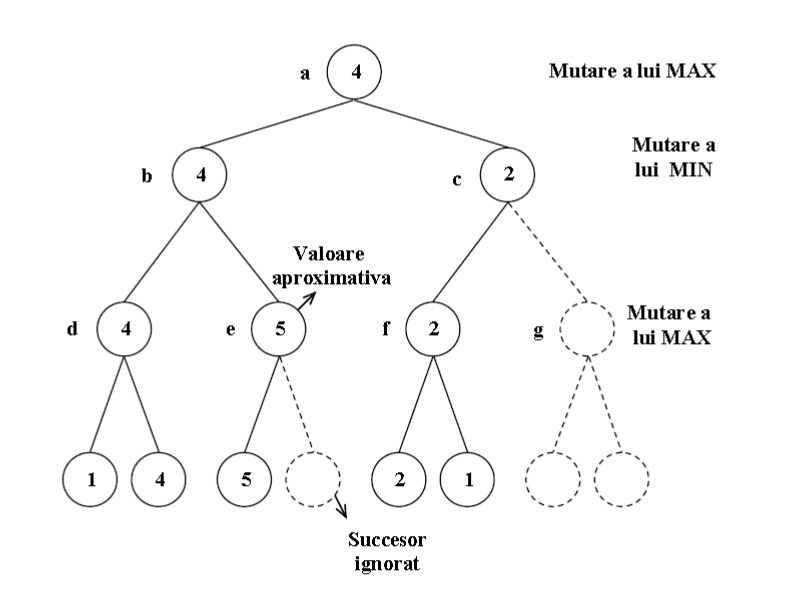

Alpha-Beta este o implementare eficientă a algoritmului Minimax.

Tehnica pe care o vom examina, în cele ce urmează, este numită în literatura de specialitate alpha-beta prunning (“alpha-beta retezare”). Atunci când este aplicată unui arbore de tip minimax standard, ea va întoarce aceeaşi mutare pe care ar furniza-o şi Algoritmul Minimax, dar într-un timp mai scurt, întrucât realizează o retezare a unor ramuri ale arborelui care nu pot influenţa decizia finală.

Principiul general al acestei tehnici constă în a considera un nod oarecare n al arborelui, astfel încât jucătorul poate alege să facă o mutare la acel nod. Dacă acelaşi jucător dispune de o alegere mai avantajoasă, m, fie la nivelul nodului părinte al lui n, fie în orice punct de decizie aflat mai sus în arbore, atunci n nu va fi niciodată atins în timpul jocului. Prin urmare, de îndată ce, în urma examinării unora dintre descendenţii nodului n, ajungem să deţinem suficientă informaţie relativ la acesta, îl putem înlătura.

Ideea tehnicii de alpha-beta retezare este aceea de a găsi o mutare “suficient de bună”, nu neapărat cea mai bună, dar suficient de bună pentru a se lua decizia corectă. Această idee poate fi formalizată prin introducerea a două limite, alpha şi beta, reprezentând limitări ale valorii de tip minimax corespunzătoare unui nod intern.

Semnificaţia acestor limite este următoarea: alpha este valoarea minimă pe care este deja garantat că o va obţine MAX, iar beta este valoarea maximă pe care MAX poate spera să o atingă. Din punctul de vedere al jucătorului MIN, beta este valoarea cea mai nefavorabilă pentru MIN pe care acesta o va atinge. Prin urmare, valoarea efectivă care va fi găsită se află între alpha şi beta.

Valoarea alpha, asociată nodurilor de tip MAX, nu poate niciodată să descrească, iar valoarea beta, asociată nodurilor de tip MIN, nu poate niciodată să crească.

Cele două reguli pentru încheierea căutării, bazată pe valori alpha şi beta, pot fi formulate după cum urmează:
- Căutarea poate fi oprită dedesubtul oricărui nod de tip MIN care are o valoare beta mai mică sau egală cu valoarea alpha a oricăruia dintre strămoşii săi de tip MAX.
- Cautarea poate fi oprită dedesubtul oricărui nod de tip MAX care are o valoare alpha mai mare sau egală cu valoarea beta a oricăruia dintre strămoşii săi de tip MIN.

Dacă, referitor la o poziţie, se arată că valoarea corespunzătoare ei se află în afara intervalului alpha-beta, atunci această informaţie este suficientă pentru a şti că poziţia respectivă nu se află de-a lungul variaţiei principale, chiar dacă nu este cunoscută valoarea exactă corespunzătoare ei. Cunoaşterea valorii exacte a unei poziţii este necesară numai atunci când această valoare se află între alpha şi beta.

Din punct de vedere formal, putem defini o valoare de tip minimax a unui nod intern, P, V( P, alpha, beta ), ca fiind “suficient de bună” dacă satisface următoarele cerinţe:
- V( P, alpha, beta ) < alpha, dacă V( P ) < alpha
- V( P, alpha, beta ) = V( P ), dacă alpha ≤ V( P ) ≤ beta
- V( P, alpha, beta ) > beta, dacă V ( P ) > beta,
unde prin V( P ) am notat valoarea de tip minimax corespunzătoare unui nod intern.

Valoarea exactă a unui nod-rădăcină P poate fi întotdeauna calculată prin setarea limitelor după cum urmează:
V( P, -∞, +∞ ) = V( P ).

Exemplu de arbore de cautare pt alg Alpha-Beta:

Aşa cum se vede în figură, unele dintre valorile de tip minimax ale nodurilor interne sunt aproximative. Totuşi, aceste aproximări sunt suficiente pentru a se determina în mod exact valoarea rădăcinii. Se observă că Algoritmul Alpha-Beta reduce complexitatea căutării de la 8 evaluări statice la numai 5 evaluări de acest tip:

## Pași

Începe din poziţia a.
2. Mutare la b.
3. Mutare la d.
4. Alege valoarea maximă a succesorilor lui d, ceea ce conduce la V( d ) = 4.
5. Întoarce-te în nodul b şi execută o mutare de aici la e.
6. Ia în consideraţie primul succesor al lui e a cărui valoare este 5. În acest moment, MAX, a cărui mutare urmează, are garantată, aflându-se în poziţia e, cel puţin valoarea 5, indiferent care ar fi celelalte alternative plecând din e. Această informaţie este suficientă pentru ca MIN să realizeze că, la nodul b, alternativa e este inferioară alternativei d. Această concluzie poate fi trasă fără a cunoaşte valoarea exactă a lui e. Pe această bază, cel de-al doilea succesor al lui e poate fi neglijat, iar nodului e i se poate atribui valoarea aproximativă 5.

Căutarea de tip alpha-beta retează nodurile figurate în mod discontinuu. Ca rezultat, câteva dintre valorile intermediare nu sunt exacte (nodurile c, e), dar aproximările făcute sunt suficiente pentru a determina atât valoarea corespunzătoare rădăcinii, cât şi variaţia principală, în mod exact.

Eficienţa Algoritmului Alpha-Beta depinde de ordinea în care sunt examinaţi succesorii. Este preferabil să fie examinaţi mai întâi succesorii despre care se crede că ar putea fi cei mai buni.

## Pseudocod

```
function alphabeta(node, depth, α, β, maximizingPlayer) is
    if depth = 0 or node is a terminal node then
        return the heuristic value of node
    if maximizingPlayer then
        value := −∞
        for each child of node do
            value := max(value, alphabeta(child, depth − 1, α, β, FALSE))
            α := max(α, value)
            if α ≥ β then
                break (* β cut-off *)
        return value
    else
        value := +∞
        for each child of node do
            value := min(value, alphabeta(child, depth − 1, α, β, TRUE))
            β := min(β, value)
            if α ≥ β then
                break (* α cut-off *)
        return value


(* Initial call *)
alphabeta(origin, depth, −∞, +∞, TRUE)
```

Exemplu detaliat: https://drive.google.com/drive/folders/15eLGNRbGx9MbQQlv30BozknwTNA1cEyh